In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
import matplotlib.pyplot as plt

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 24s 2us/step


In [4]:
X_train.shape

(60000, 28, 28)

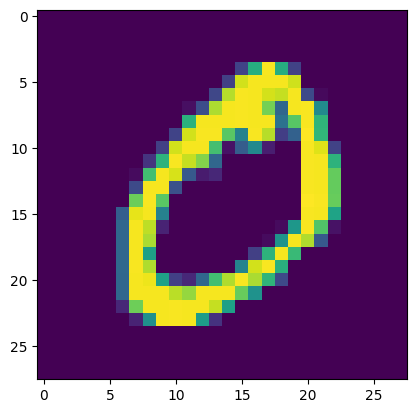

In [7]:
plt.imshow(X_train[1])

In [9]:
num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [12]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [13]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [15]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [20]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [29]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 6s - loss: 0.1855 - accuracy: 0.9439 - val_loss: 0.0862 - val_accuracy: 0.9736 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 6s - loss: 0.0791 - accuracy: 0.9758 - val_loss: 0.0743 - val_accuracy: 0.9754 - 6s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 6s - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0865 - val_accuracy: 0.9722 - 6s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 6s - loss: 0.0409 - accuracy: 0.9868 - val_loss: 0.0703 - val_accuracy: 0.9803 - 6s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 6s - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0652 - val_accuracy: 0.9817 - 6s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 6s - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.0874 - val_accuracy: 0.9790 - 6s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 6s - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0800 - val_accuracy: 0.9792 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 6s - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0745 - val_accuracy: 0.9799 - 6s/epoch - 3ms/step
Epoch 9/

In [22]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.977400004863739% 
 Error: 0.022599995136260986


In [23]:
model.save('classification_model.h5')

In [24]:
from keras.models import load_model

In [25]:
pretrained_model = load_model('classification_model.h5')